In [1]:
import pandas as pd
import numpy as np

In [2]:
#load data
df = pd.read_excel("titanic-1.xls")

df.head() #first 5 rows

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
## move name column to first column
col = df.pop("name")
df.insert(0, col.name, col)
df.head()

,name,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,"Allen, Miss. Elisabeth Walton",1,1,female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,"Allison, Master. Hudson Trevor",1,1,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,"Allison, Miss. Helen Loraine",1,0,female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,"Allison, Mr. Hudson Joshua Creighton",1,0,male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,0,female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
#descriptive statistics
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [5]:
#total number of passengers
total = len(df)

print(total)

1309


In [6]:
#check to see if there are any missing values
df.count()

name         1309
pclass       1309
survived     1309
sex          1309
age          1046
sibsp        1309
parch        1309
ticket       1309
fare         1308
cabin         295
embarked     1307
boat          486
body          121
home.dest     745
dtype: int64

In [7]:
df.isnull().sum()

name            0
pclass          0
survived        0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [8]:
## these columns have lot of missing values
df.drop("body", axis=1, inplace = True) 
df.drop("cabin", axis=1, inplace = True)
df.drop("home.dest", axis=1, inplace = True)
df.drop("boat", axis=1, inplace = True)
df

,name,pclass,survived,sex,age,sibsp,parch,ticket,fare,embarked
0,"Allen, Miss. Elisabeth Walton",1,1,female,29.0000,0,0,24160,211.3375,S
1,"Allison, Master. Hudson Trevor",1,1,male,0.9167,1,2,113781,151.5500,S
2,"Allison, Miss. Helen Loraine",1,0,female,2.0000,1,2,113781,151.5500,S
3,"Allison, Mr. Hudson Joshua Creighton",1,0,male,30.0000,1,2,113781,151.5500,S
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,0,female,25.0000,1,2,113781,151.5500,S
...,...,...,...,...,...,...,...,...,...,...
1304,"Zabour, Miss. Hileni",3,0,female,14.5000,1,0,2665,14.4542,C
1305,"Zabour, Miss. Thamine",3,0,female,NaN,1,0,2665,14.4542,C
1306,"Zakarian, Mr. Mapriededer",3,0,male,26.5000,0,0,2656,7.2250,C
1307,"Zakarian, Mr. Ortin",3,0,male,27.0000,0,0,2670,7.2250,C


In [9]:
## drop unnecessary column
df.drop(["ticket"], axis=1, inplace = True)
df

,name,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,"Allen, Miss. Elisabeth Walton",1,1,female,29.0000,0,0,211.3375,S
1,"Allison, Master. Hudson Trevor",1,1,male,0.9167,1,2,151.5500,S
2,"Allison, Miss. Helen Loraine",1,0,female,2.0000,1,2,151.5500,S
3,"Allison, Mr. Hudson Joshua Creighton",1,0,male,30.0000,1,2,151.5500,S
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,0,female,25.0000,1,2,151.5500,S
...,...,...,...,...,...,...,...,...,...
1304,"Zabour, Miss. Hileni",3,0,female,14.5000,1,0,14.4542,C
1305,"Zabour, Miss. Thamine",3,0,female,NaN,1,0,14.4542,C
1306,"Zakarian, Mr. Mapriededer",3,0,male,26.5000,0,0,7.2250,C
1307,"Zakarian, Mr. Ortin",3,0,male,27.0000,0,0,7.2250,C


In [10]:
df["age"].median()

28.0

In [11]:
df["age"].fillna(df["age"].mean(), inplace = True)  ## fill missing age values with mean age

In [12]:
#rows of passangers that survived
df_survive = df[df['survived'] >= 1]

#number of students that passed
n_survive = len(df_survive)

print(n_survive)

500


In [13]:
df.isnull().sum()

name        0
pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        1
embarked    2
dtype: int64

In [14]:
df.dropna(subset=["fare"], inplace = True)
df.dropna(subset=["embarked"], inplace = True)

In [15]:
df.isnull().sum()

name        0
pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      1306 non-null   object 
 1   pclass    1306 non-null   int64  
 2   survived  1306 non-null   int64  
 3   sex       1306 non-null   object 
 4   age       1306 non-null   float64
 5   sibsp     1306 non-null   int64  
 6   parch     1306 non-null   int64  
 7   fare      1306 non-null   float64
 8   embarked  1306 non-null   object 
dtypes: float64(2), int64(4), object(3)
memory usage: 102.0+ KB


### Gaussian Naïve Bayes

There are different types of Naive Bayes functions and in the examples below, we will use Gaussian Bayes to build the predictive model. Gaussian Bayes uses conditional probability on data that is normally distributed.

In [17]:
from sklearn.naive_bayes import GaussianNB   #import Gaussian Bayes modeling function
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [18]:
df.head()

,name,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,"Allen, Miss. Elisabeth Walton",1,1,female,29.0000,0,0,211.3375,S
1,"Allison, Master. Hudson Trevor",1,1,male,0.9167,1,2,151.5500,S
2,"Allison, Miss. Helen Loraine",1,0,female,2.0000,1,2,151.5500,S
3,"Allison, Mr. Hudson Joshua Creighton",1,0,male,30.0000,1,2,151.5500,S
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,0,female,25.0000,1,2,151.5500,S


In [19]:
#create a dataframe with columns to use in the model
modeldf = df[['sex', 'age', 'survived', 'fare', 'sibsp','pclass', 'embarked']].copy()
modeldf.head()

,sex,age,survived,fare,sibsp,pclass,embarked
0,female,29.0000,1,211.3375,0,1,S
1,male,0.9167,1,151.5500,1,1,S
2,female,2.0000,0,151.5500,1,1,S
3,male,30.0000,0,151.5500,1,1,S
4,female,25.0000,0,151.5500,1,1,S


In [20]:
modeldf['embarked'].value_counts()

S    913
C    270
Q    123
Name: embarked, dtype: int64

In [21]:
#transform gender column to binary values (0,1). Embarked columns assign numeric values
modeldf['sex'] = modeldf['sex'].map({'female': 0, 'male': 1})
modeldf['embarked'] = modeldf['embarked'].map({'S': 1, 'C': 2, 'Q': 3})

modeldf.head()

,sex,age,survived,fare,sibsp,pclass,embarked
0,0,29.0000,1,211.3375,0,1,1
1,1,0.9167,1,151.5500,1,1,1
2,0,2.0000,0,151.5500,1,1,1
3,1,30.0000,0,151.5500,1,1,1
4,0,25.0000,0,151.5500,1,1,1


In [22]:
#see which features are correlated to each other
modeldf.corr()

,sex,age,survived,fare,sibsp,pclass,embarked
sex,1.000000,0.059639,-0.527248,-0.184034,-0.110529,0.121407,-0.121567
age,0.059639,1.000000,-0.052135,0.170266,-0.189671,-0.366695,0.038564
survived,-0.527248,-0.052135,1.000000,0.242960,-0.027228,-0.310064,0.099451
fare,-0.184034,0.170266,0.242960,1.000000,0.161030,-0.557861,0.062017
sibsp,-0.110529,-0.189671,-0.027228,0.161030,1.000000,0.060149,-0.074176
pclass,0.121407,-0.366695,-0.310064,-0.557861,0.060149,1.000000,0.037931
embarked,-0.121567,0.038564,0.099451,0.062017,-0.074176,0.037931,1.000000


In [23]:
modeldf['survived'].value_counts()

0    808
1    498
Name: survived, dtype: int64

In [24]:
modeldf.dtypes

sex           int64
age         float64
survived      int64
fare        float64
sibsp         int64
pclass        int64
embarked      int64
dtype: object

In [25]:
#dataframe with predicting features
X = modeldf.drop('survived', axis=1)

#column of predictive target values
y = modeldf['survived']

In [26]:
X

,sex,age,fare,sibsp,pclass,embarked
0,0,29.000000,211.3375,0,1,1
1,1,0.916700,151.5500,1,1,1
2,0,2.000000,151.5500,1,1,1
3,1,30.000000,151.5500,1,1,1
4,0,25.000000,151.5500,1,1,1
...,...,...,...,...,...,...
1304,0,14.500000,14.4542,1,3,2
1305,0,29.881135,14.4542,1,3,2
1306,1,26.500000,7.2250,0,3,2
1307,1,27.000000,7.2250,0,3,2


In [27]:
y.value_counts()

0    808
1    498
Name: survived, dtype: int64

In [28]:
#create training and test data
#will leave test size at default (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [29]:
#initialize Gaussian Bayes classifier
gnb = GaussianNB()

In [30]:
#train the model to learn trends
gnb.fit(X_train, y_train)

GaussianNB()

In [31]:
#predictive score of the model on the training data
gnb.score(X_train, y_train)

0.7783452502553626

In [32]:
#test the model on unseen data
#score predictive values in variable
y_pred = gnb.predict(X_test)

In [33]:
#Confusion matrix shows which values model predicted correctly vs incorrectly

cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Died', 'Predicted Survived'],
    index=['True Died', 'True Survived']
)

cm

,Predicted Died,Predicted Survived
True Died,168,30
True Survived,48,81


In [34]:
#frequency of passed students to failed students in the test dataset
y_test.value_counts()

0    198
1    129
Name: survived, dtype: int64

In [35]:
#predictive score of the model on the test data
gnb.score(X_test, y_test)

0.7614678899082569

In [36]:
#predictive score of the model for each predictive category
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       198
           1       0.73      0.63      0.68       129

    accuracy                           0.76       327
   macro avg       0.75      0.74      0.74       327
weighted avg       0.76      0.76      0.76       327



### Bernoulli's Naïve Bayes

Bernoull's Naïve Bayes classifier is best on a target variable that is binary (Boolean; True/False (1,0) values). Let's try this method on the dataset from the previous example.

In [37]:
#import Bernoulli Naïve Bayes function from scikit-learn library
from sklearn.naive_bayes import BernoulliNB

In [38]:
#initialize Bernoulli Naïve Bayes function to a variable
bnb = BernoulliNB()

In [39]:
#build the model with training data
bnb.fit(X_train, y_train)

BernoulliNB()

In [40]:
#model's predictive score on the training data
bnb.score(X_train, y_train)

0.7875383043922369

In [41]:
#test the model on unseen data
#score predictive values in variable
y_pred = gnb.predict(X_test)

In [42]:
#Confusion matrix shows which values model predicted correctly vs incorrectly

cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Died', 'Predicted Survived'],
    index=['True Died', 'True Survived']
)

cm

,Predicted Died,Predicted Survived
True Died,168,30
True Survived,48,81


In [43]:
#predictive score of the model on the test data
gnb.score(X_test, y_test)

0.7614678899082569

### Logical Regression Modeling

In [44]:
import statsmodels.formula.api as sm

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

In [51]:
df_logical = df.copy()

In [52]:
df_logical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      1306 non-null   object 
 1   pclass    1306 non-null   int64  
 2   survived  1306 non-null   int64  
 3   sex       1306 non-null   object 
 4   age       1306 non-null   float64
 5   sibsp     1306 non-null   int64  
 6   parch     1306 non-null   int64  
 7   fare      1306 non-null   float64
 8   embarked  1306 non-null   object 
dtypes: float64(2), int64(4), object(3)
memory usage: 102.0+ KB


In [53]:
df_logical.head()

,name,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,"Allen, Miss. Elisabeth Walton",1,1,female,29.0000,0,0,211.3375,S
1,"Allison, Master. Hudson Trevor",1,1,male,0.9167,1,2,151.5500,S
2,"Allison, Miss. Helen Loraine",1,0,female,2.0000,1,2,151.5500,S
3,"Allison, Mr. Hudson Joshua Creighton",1,0,male,30.0000,1,2,151.5500,S
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,0,female,25.0000,1,2,151.5500,S


In [54]:
## convert gender column to binary values. embarked to numeric values
df_logical['sex'] = df_logical['sex'].map({'female': 0, 'male': 1})
df_logical['embarked'] = df_logical['embarked'].map({'S': 1, 'C': 2, 'Q': 3})

In [64]:
df_logical.head()

,name,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,"Allen, Miss. Elisabeth Walton",1,1,0,29.0000,0,0,211.3375,1
1,"Allison, Master. Hudson Trevor",1,1,1,0.9167,1,2,151.5500,1
2,"Allison, Miss. Helen Loraine",1,0,0,2.0000,1,2,151.5500,1
3,"Allison, Mr. Hudson Joshua Creighton",1,0,1,30.0000,1,2,151.5500,1
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,0,0,25.0000,1,2,151.5500,1


In [65]:
df_logical.corr()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
pclass,1.000000,-0.310064,0.121407,-0.366695,0.060149,0.017596,-0.557861,0.037931
survived,-0.310064,1.000000,-0.527248,-0.052135,-0.027228,0.083400,0.242960,0.099451
sex,0.121407,-0.527248,1.000000,0.059639,-0.110529,-0.214179,-0.184034,-0.121567
age,-0.366695,-0.052135,0.059639,1.000000,-0.189671,-0.129637,0.170266,0.038564
sibsp,0.060149,-0.027228,-0.110529,-0.189671,1.000000,0.373281,0.161030,-0.074176
parch,0.017596,0.083400,-0.214179,-0.129637,0.373281,1.000000,0.222327,-0.096202
fare,-0.557861,0.242960,-0.184034,0.170266,0.161030,0.222327,1.000000,0.062017
embarked,0.037931,0.099451,-0.121567,0.038564,-0.074176,-0.096202,0.062017,1.000000


0    808
1    498
Name: survived, dtype: int64


<AxesSubplot:xlabel='survived', ylabel='count'>

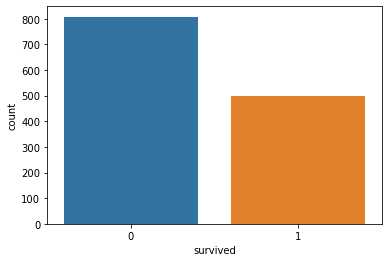

In [66]:
print(df_logical["survived"].value_counts())

sns.countplot(data = df_logical, x = "survived")

survived
0    30.352103
1    28.974711
Name: age, dtype: float64


<AxesSubplot:xlabel='survived', ylabel='age'>

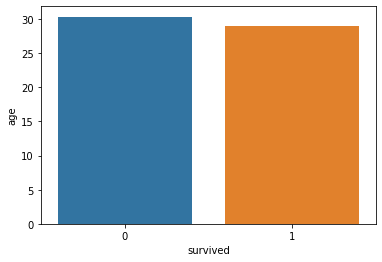

In [67]:
print(df_logical["age"].groupby(df_logical["survived"]).mean())

###

sns.barplot(data = df_logical, x = "survived", y = "age", ci = None)

survived
0    23.353831
1    49.238136
Name: fare, dtype: float64


<AxesSubplot:xlabel='survived', ylabel='fare'>

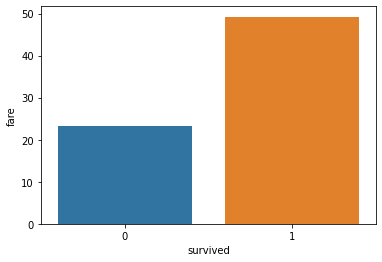

In [68]:
print(df_logical["fare"].groupby(df_logical["survived"]).mean())

###

sns.barplot(data = df_logical, x = "survived", y = "fare", ci = None)

### looks like those that survived paid a higher fare

survived
0    0.842822
1    0.323293
Name: sex, dtype: float64


<AxesSubplot:xlabel='survived', ylabel='sex'>

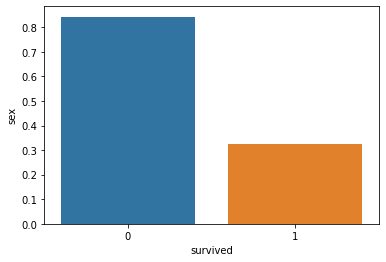

In [71]:
print(df_logical["sex"].groupby(df_logical["survived"]).mean())

###

sns.barplot(data = df_logical, x = "survived", y = "sex", ci = None)

#### Those that died were mostly men

In [73]:
pd.crosstab(df_logical["sex"], df_logical["survived"], margins=False, normalize=False)

survived,0,1
sex,,
0,127,337
1,681,161


In [74]:
df_logical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      1306 non-null   object 
 1   pclass    1306 non-null   int64  
 2   survived  1306 non-null   int64  
 3   sex       1306 non-null   int64  
 4   age       1306 non-null   float64
 5   sibsp     1306 non-null   int64  
 6   parch     1306 non-null   int64  
 7   fare      1306 non-null   float64
 8   embarked  1306 non-null   int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 134.3+ KB


In [98]:
## creating the model is VERY similar to a linear regression model
## include "logit" instead of "ols"

mod1 = sm.logit('survived ~ age + sex + fare + embarked + sibsp', data=df_logical).fit()

mod1.summary()

Optimization terminated successfully.
         Current function value: 0.493799
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                 1306
Model:                          Logit   Df Residuals:                     1300
Method:                           MLE   Df Model:                            5
Date:                Tue, 19 Apr 2022   Pseudo R-squ.:                  0.2571
Time:                        20:45:06   Log-Likelihood:                -644.90
converged:                       True   LL-Null:                       -868.10
Covariance Type:            nonrobust   LLR p-value:                 2.928e-94
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2118      0.260      4.654      0.000       0.701       1.722
age           -0.0185      0.006     -3.243      0.001      -0.030      -0.007
sex           -2.4135      0.145    -16.606      0.000      -2.698      -2.129
fare           0.0125      0.002      6.579      0.000       0.009       0.016
embarked       0.0766      0.106      0.725      0.469      -0.131       0.284
sibsp         -0.4051      0.083     -4.857      0.000      -0.569      -0.242
==============================================================================
"""

In [99]:
## create a dataframe with the variable names, OR's and p-values
# np.exp >> calculate the exponential of a given value

df_odds = pd.DataFrame(np.exp(mod1.params), columns = ['OR'])

## pull the pvalues directly from the model

df_odds["pvalue"] = mod1.pvalues

## create a variable to quickly determine sig

df_odds["Sig"] = np.where(df_odds["pvalue"] <= 0.05, "Sig", "Not Sig")

## print new dataset

df_odds

,OR,pvalue,Sig
Intercept,3.359616,3.260418e-06,Sig
age,0.981629,1.184044e-03,Sig
sex,0.089502,6.295180e-62,Sig
fare,1.012623,4.723923e-11,Sig
embarked,1.079594,4.685819e-01,Not Sig
sibsp,0.666926,1.189101e-06,Sig


In [100]:
## percent change = OR minus 1 multiplied by 100

df_odds["Pct Change"] = (df_odds["OR"] - 1) * 100

df_odds

,OR,pvalue,Sig,Pct Change
Intercept,3.359616,3.260418e-06,Sig,235.961605
age,0.981629,1.184044e-03,Sig,-1.837130
sex,0.089502,6.295180e-62,Sig,-91.049797
fare,1.012623,4.723923e-11,Sig,1.262297
embarked,1.079594,4.685819e-01,Not Sig,7.959409
sibsp,0.666926,1.189101e-06,Sig,-33.307404


In [101]:
df_logical['sibsp'].value_counts()

0    888
1    319
2     42
4     22
3     20
8      9
5      6
Name: sibsp, dtype: int64

In [104]:
mod1.predict({
    'age': 30, 
    'sex': 0, 
    'fare': 67, 
    'embarked': 2, 
    'sibsp': 1})

## if probability is greater than 50% > we classify this individual as having survived

0    0.776277
dtype: float64

#### 30 year old female who paid $67 embarked at C and on sibsp 1 is most likely going to survive

In [105]:
mod1.predict({
    'age': 30, 
    'sex': 1, 
    'fare': 67, 
    'embarked': 2, 
    'sibsp': 1})

## if probability is greater than 50% > we classify this individual as having survived

0    0.236965
dtype: float64

#### 30 year old male who paid $67 embarked at C and on sibsp 1 most likely will die

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

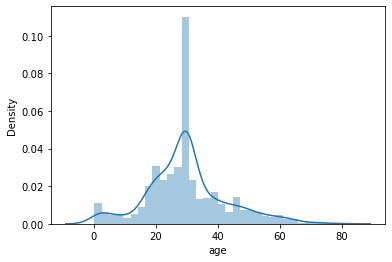

In [88]:
sns.distplot(df_logical['age'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fare', ylabel='Density'>

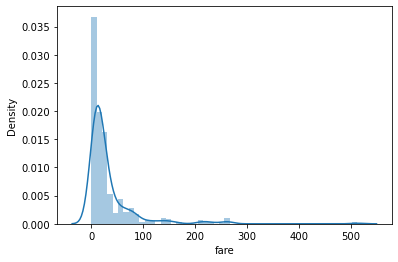

In [95]:
sns.distplot(df_logical['fare'])

In [93]:
df_logical['age'].describe()

count    1306.000000
mean       29.826880
std        12.837289
min         0.166700
25%        22.000000
50%        29.881135
75%        35.000000
max        80.000000
Name: age, dtype: float64

In [94]:
df_logical['fare'].describe()

count    1306.000000
mean       33.223956
std        51.765986
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64

In [97]:
df_logical['fare'].mode()

0    8.05
dtype: float64

In [124]:
df_log = df_logical.copy()

In [125]:
df_log.drop("name", axis = 1, inplace = True)

In [126]:
df_log.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,0,29.0000,0,0,211.3375,1
1,1,1,1,0.9167,1,2,151.5500,1
2,1,0,0,2.0000,1,2,151.5500,1
3,1,0,1,30.0000,1,2,151.5500,1
4,1,0,0,25.0000,1,2,151.5500,1


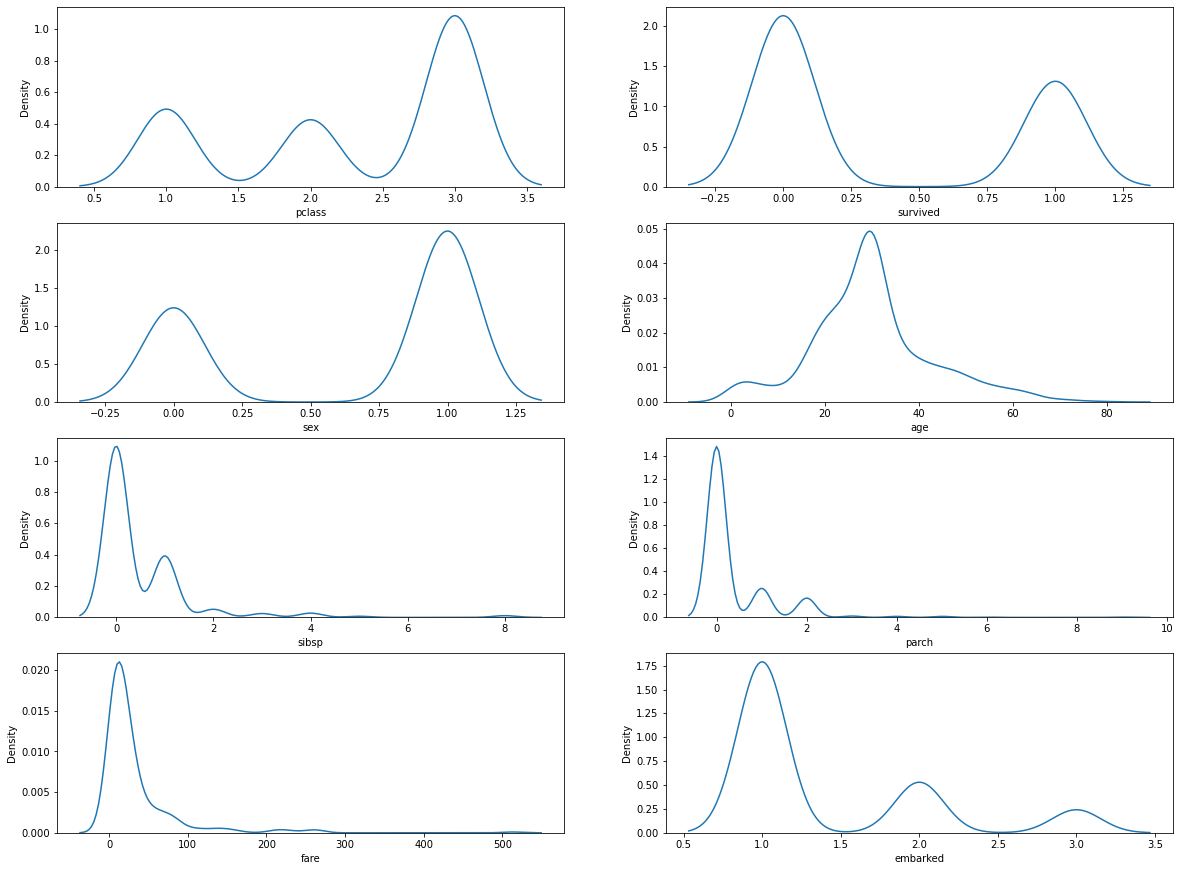

In [127]:
plt.figure(figsize=(20,35))
for i, col in enumerate(df_log.columns):
    ax = plt.subplot(9, 2, i+1)
    sns.kdeplot(df_log[col], ax=ax)
    plt.xlabel(col)
        
plt.show()

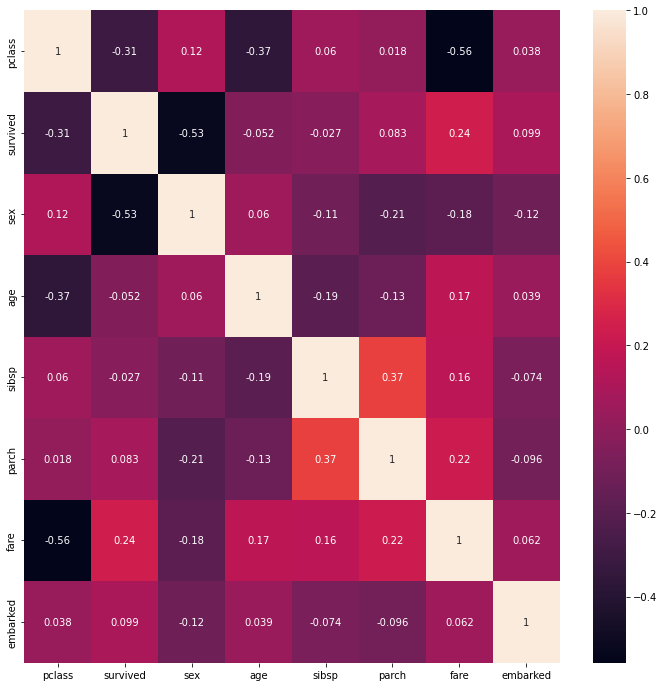

In [128]:
plt.figure(figsize=(12,12))
sns.heatmap(df_log.corr(), annot=True)
plt.show()